# Section 0
We first import some libraries.

In [1]:
import numpy as np
import random
import os
import matplotlib as mpl
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.optimizers import *
from keras.losses import *
from sklearn.model_selection import KFold
from keras.layers import LeakyReLU, Dense
import tensorflow
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import skimage
import requests
from io import BytesIO
from PIL import Image, ImageFilter
from matplotlib import cm

!pip install ipython-autotime
%load_ext autotime

time: 1.7 ms (started: 2022-02-10 18:38:13 +00:00)


# Section 1


All of the ideas for doing the code for this part came from this website:
'https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/'

In [2]:
class Section_1_model:
    def __init__(self, function=None, number_of_layers=5, batch_size=1, number_of_epochs=1,
                 loss_function=mean_squared_error, dataset_size=20000,
                 train_min_value=1, train_max_value=5, test_min_value=0, 
                 test_max_value=10, number_of_plotted_samples=2000,
                 neuran_scale = 128, noise_mult = 0):
        self.number_of_layers = number_of_layers
        self.batch_size = batch_size
        self.number_of_epochs = number_of_epochs
        self.loss_function = loss_function
        self.dataset_size = dataset_size
        self.train_min_value = train_min_value
        self.train_max_value = train_max_value
        self.test_min_value = test_min_value
        self.test_max_value = test_max_value
        self.function = function
        self.number_of_plotted_samples = number_of_plotted_samples
        self.X_values = None
        self.y_values = None
        self.model = None
        self.neuran_scale = neuran_scale
        self.noise_mult = noise_mult

    def make_dataset(self, include_noise = False):
      X_values = np.linspace(self.train_min_value, self.train_max_value, num=self.dataset_size)
      y_values = self.function(X_values)
      if include_noise:
        y = np.array(list(map(lambda x: self.add_noise(x), y_values)))
      permuted_data = np.random.permutation(self.dataset_size)
      self.X_values = X_values[permuted_data]
      self.y_values = y_values[permuted_data]

    def train(self):
        k_fold = KFold(n_splits=self.number_of_layers, shuffle=True)

        loss_in_each_fold = []
        all_models = []
        fold_number = 1
        for train, test in k_fold.split(self.X_values, self.y_values):
            model = keras.Sequential()
            model.add(keras.layers.Dense(self.neuran_scale, input_dim=1, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(self.neuran_scale*2, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(self.neuran_scale*4, kernel_initializer='normal', activation='exponential'))
            model.add(keras.layers.Dense(self.neuran_scale*4, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

            model.compile(loss=self.loss_function, optimizer='adam')

            history = model.fit(self.X_values[train], self.y_values[train], batch_size=self.batch_size,
                                epochs=self.number_of_epochs, verbose=False)
            scores = model.evaluate(self.X_values[test], self.y_values[test], verbose=0)
            loss_in_each_fold.append(scores)
            all_models.append(model)

            fold_number = fold_number + 1

        print('#############')
        print('Score per each fold is: ')
        for i in range(0, len(loss_in_each_fold)):
            print('#############')
            print(f'Fold {i + 1} - Loss: {loss_in_each_fold[i]}')
        print('#############')
        print('Average scores for all folds:')
        print(f'Loss: {np.mean(loss_in_each_fold)}')
        print('#############')

        best_model_index = np.argmin(loss_in_each_fold)
        best_model = all_models[best_model_index]
        self.model = best_model
        self.best_loss = loss_in_each_fold[best_model_index]
        self.avg_loss = np.mean(loss_in_each_fold)
        return best_model

    def plot(self):
      test_range = np.linspace(self.test_min_value, self.test_max_value, self.number_of_plotted_samples)
      myY = self.model.predict(test_range)
      actualY = self.function(test_range)
      plt.plot(test_range, myY, '-r', label = 'prediction function')
      plt.plot(test_range, actualY, '--b', alpha=0.5, label = 'actual function')
      plt.xlabel('x value')
      plt.ylabel('y value')
      plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
      plt.show()

    def add_noise(self, number):
          noise_multiplier = (random.random() - 0.5) * 2 * self.noise_mult
          return number * (1 + noise_multiplier)


time: 240 ms (started: 2022-02-10 18:38:13 +00:00)


## Test time!
### Function 1: sin(x)
let's begin our tests with function sin(x) and change all different variables:

#############
Score per each fold is: 
#############
Fold 1 - Loss: 7.88182660471648e-05
#############
Fold 2 - Loss: 3.461968299234286e-05
#############
Fold 3 - Loss: 0.0015667355619370937
#############
Fold 4 - Loss: 0.019253918901085854
#############
Fold 5 - Loss: 2.7524074539542198e-05
#############
Average scores for all folds:
Loss: 0.0041923232973204
#############
best loss value seen: 2.7524074539542198e-05
average loss value over all folds: 0.0041923232973204


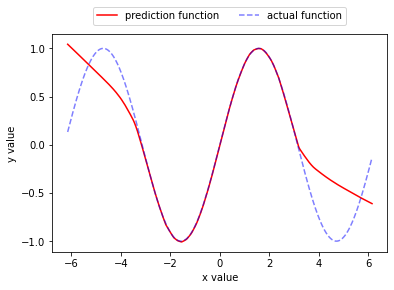

time: 1min 40s (started: 2022-02-10 18:38:13 +00:00)


In [3]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 10, batch_size = 32, 
                            train_min_value = float(-3.14), train_max_value = float(3.14),
                            test_min_value = float(-6.15), test_max_value = float(6.15),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Test 1:
reduce epochs to 5 and dataset size to 5000

#############
Score per each fold is: 
#############
Fold 1 - Loss: 3.26374574797228e-05
#############
Fold 2 - Loss: 0.00018132454715669155
#############
Fold 3 - Loss: 0.0001277647097595036
#############
Fold 4 - Loss: 0.00032973612542264163
#############
Fold 5 - Loss: 2.5269569960073568e-05
#############
Average scores for all folds:
Loss: 0.00013934648195572662
#############
best loss value seen: 2.5269569960073568e-05
average loss value over all folds: 0.00013934648195572662


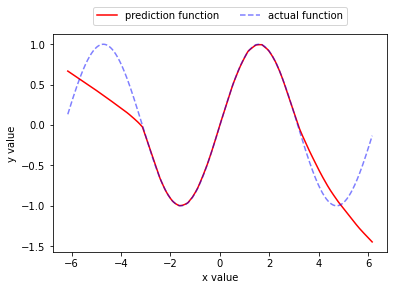

time: 15.1 s (started: 2022-02-10 18:39:53 +00:00)


In [4]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-3.14), train_max_value = float(3.14),
                            test_min_value = float(-6.15), test_max_value = float(6.15),
                            dataset_size = 5000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Increase training range.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.009573756717145443
#############
Fold 2 - Loss: 0.008818252012133598
#############
Fold 3 - Loss: 0.010359199717640877
#############
Fold 4 - Loss: 0.005833726841956377
#############
Fold 5 - Loss: 0.00805915892124176
#############
Average scores for all folds:
Loss: 0.008528818842023611
#############
best loss value seen: 0.005833726841956377
average loss value over all folds: 0.008528818842023611


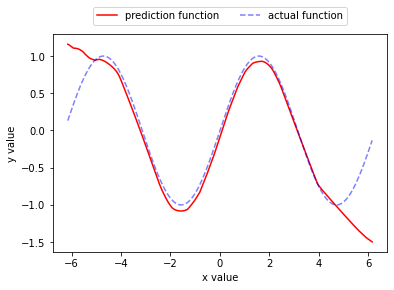

time: 15.1 s (started: 2022-02-10 18:40:09 +00:00)


In [5]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-5.14), train_max_value = float(5.14),
                            test_min_value = float(-6.15), test_max_value = float(6.15),
                            dataset_size = 5000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Now increase training range and dataset size at the same time, since previous 
plot shows that we didn't fit the training data perfectly.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.00411413237452507
#############
Fold 2 - Loss: 0.0003456706181168556
#############
Fold 3 - Loss: 0.0010093540186062455
#############
Fold 4 - Loss: 3.613954322645441e-05
#############
Fold 5 - Loss: 0.00066392618464306
#############
Average scores for all folds:
Loss: 0.0012338445478235372
#############
best loss value seen: 3.613954322645441e-05
average loss value over all folds: 0.0012338445478235372


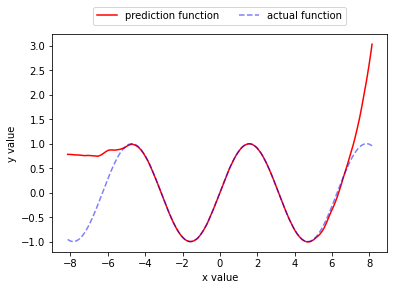

time: 52.4 s (started: 2022-02-10 18:40:24 +00:00)


In [6]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-5.14), train_max_value = float(5.14),
                            test_min_value = float(-8.15), test_max_value = float(8.15),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Now increase the neurans by 2x for previous test and re-do it.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.009564450941979885
#############
Fold 2 - Loss: 0.001913327956572175
#############
Fold 3 - Loss: 0.0006990527617745101
#############
Fold 4 - Loss: 0.0015804318245500326
#############
Fold 5 - Loss: 0.0008270185207948089
#############
Average scores for all folds:
Loss: 0.0029168564011342823
#############
best loss value seen: 0.0006990527617745101
average loss value over all folds: 0.0029168564011342823


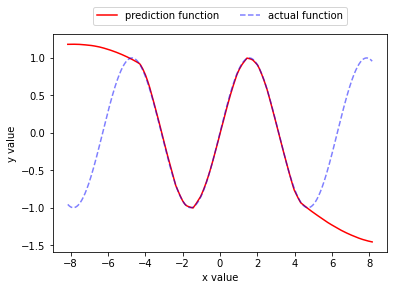

time: 48.3 s (started: 2022-02-10 18:41:16 +00:00)


In [7]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-5.14), train_max_value = float(5.14),
                            test_min_value = float(-8.15), test_max_value = float(8.15),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error, neuran_scale = 256)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Increase batch size.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 2.4955976186902262e-05
#############
Fold 2 - Loss: 0.00012082493776688352
#############
Fold 3 - Loss: 3.516987999319099e-05
#############
Fold 4 - Loss: 0.00027721503283828497
#############
Fold 5 - Loss: 1.0063972695206758e-05
#############
Average scores for all folds:
Loss: 9.36459598960937e-05
#############
best loss value seen: 1.0063972695206758e-05
average loss value over all folds: 9.36459598960937e-05


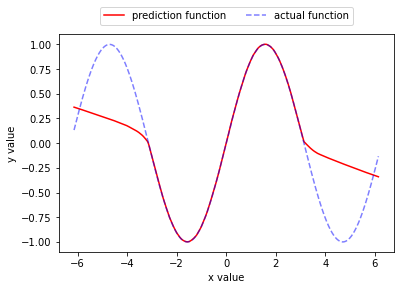

time: 39.2 s (started: 2022-02-10 18:42:04 +00:00)


In [8]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 10, batch_size = 64, 
                            train_min_value = float(-3.14), train_max_value = float(3.14),
                            test_min_value = float(-6.15), test_max_value = float(6.15),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('np.sin(x)'),
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

### Function 2: x^3+ 3*x^2 + 3*x + 1

#############
Score per each fold is: 
#############
Fold 1 - Loss: 4.1294403076171875
#############
Fold 2 - Loss: 0.020377960056066513
#############
Fold 3 - Loss: 0.14917320013046265
#############
Fold 4 - Loss: 1.0159587860107422
#############
Fold 5 - Loss: 0.13023912906646729
#############
Average scores for all folds:
Loss: 1.0890378765761852
#############
best loss value seen: 0.020377960056066513
average loss value over all folds: 1.0890378765761852


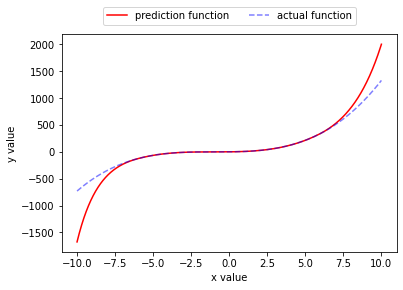

time: 51.9 s (started: 2022-02-10 18:42:44 +00:00)


In [9]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-6), train_max_value = float(6),
                            test_min_value = float(-10), test_max_value = float(10),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('x**3+3*x**2+3*x+1'),
                            loss_function=mean_squared_error, neuran_scale = 128)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

### Function 3: x+sin(x)

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.000465157616417855
#############
Fold 2 - Loss: 0.015329543501138687
#############
Fold 3 - Loss: 4.7728204663144425e-05
#############
Fold 4 - Loss: 0.009199360385537148
#############
Fold 5 - Loss: 0.0008351228316314518
#############
Average scores for all folds:
Loss: 0.0051753825078776575
#############
best loss value seen: 4.7728204663144425e-05
average loss value over all folds: 0.0051753825078776575


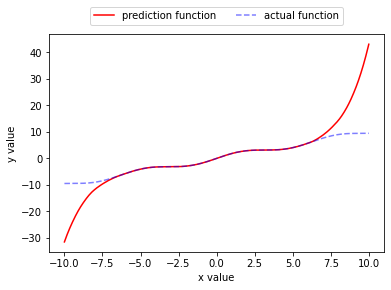

time: 47.9 s (started: 2022-02-10 18:43:36 +00:00)


In [10]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(-6), train_max_value = float(6),
                            test_min_value = float(-10), test_max_value = float(10),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('x+(np.sin(x))'),
                            loss_function=mean_squared_error, neuran_scale = 128)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

### Function 4: x^2*ln(x)

#############
Score per each fold is: 
#############
Fold 1 - Loss: 4.8676774895284325e-05
#############
Fold 2 - Loss: 0.0013566232519224286
#############
Fold 3 - Loss: 0.00013984707766212523
#############
Fold 4 - Loss: 0.003330213250592351
#############
Fold 5 - Loss: 0.00014358203043229878
#############
Average scores for all folds:
Loss: 0.0010037884771008977
#############
best loss value seen: 4.8676774895284325e-05
average loss value over all folds: 0.0010037884771008977


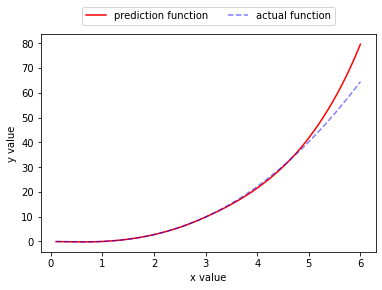

time: 42.9 s (started: 2022-02-10 18:44:23 +00:00)


In [11]:
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = float(0.1), train_max_value = float(3),
                            test_min_value = float(0.1), test_max_value = float(6),
                            dataset_size = 20000, number_of_plotted_samples = 2000,
                            function = lambda x: eval('(x**2)*(np.log(x))'),
                            loss_function=mean_squared_error, neuran_scale = 128)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

# Section 2

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.025431223213672638
#############
Fold 2 - Loss: 0.029016170650720596
#############
Fold 3 - Loss: 0.028546245768666267
#############
Fold 4 - Loss: 0.030652141198515892
#############
Fold 5 - Loss: 0.04699331149458885
#############
Average scores for all folds:
Loss: 0.03212781846523285
#############
best loss value seen: 0.025431223213672638
average loss value over all folds: 0.03212781846523285
noise factor: 0.1


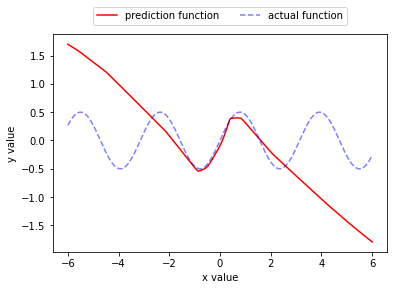

time: 7.11 s (started: 2022-02-10 19:11:09 +00:00)


In [46]:
noise_mult = 0.1
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 3, batch_size = 32, 
                            train_min_value = float(-3), train_max_value = float(3),
                            test_min_value = float(-6), test_max_value = float(6),
                            dataset_size = 2000, number_of_plotted_samples = 500,
                            function = lambda x: eval('np.sin(x)*np.cos(x)'),
                            loss_function=mean_squared_error, neuran_scale = 128,
                            noise_mult=noise_mult)

regressor.make_dataset(include_noise = True)
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
print(f'noise factor: {noise_mult}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.028159549459815025
#############
Fold 2 - Loss: 0.019737279042601585
#############
Fold 3 - Loss: 0.05734775587916374
#############
Fold 4 - Loss: 0.03883395344018936
#############
Fold 5 - Loss: 0.027749011293053627
#############
Average scores for all folds:
Loss: 0.03436550982296467
#############
best loss value seen: 0.019737279042601585
average loss value over all folds: 0.03436550982296467
noise factor: 0.5


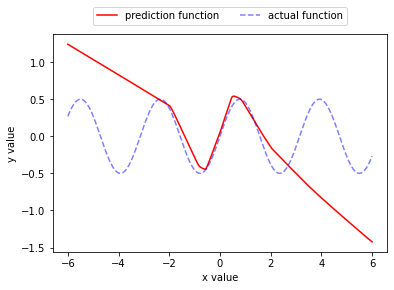

time: 6.77 s (started: 2022-02-10 19:11:16 +00:00)


In [47]:
noise_mult = 0.5
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 3, batch_size = 32, 
                            train_min_value = float(-3), train_max_value = float(3),
                            test_min_value = float(-6), test_max_value = float(6),
                            dataset_size = 2000, number_of_plotted_samples = 500,
                            function = lambda x: eval('np.sin(x)*np.cos(x)'),
                            loss_function=mean_squared_error, neuran_scale = 128,
                            noise_mult=noise_mult)

regressor.make_dataset(include_noise = True)
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
print(f'noise factor: {noise_mult}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.01788509450852871
#############
Fold 2 - Loss: 0.024960946291685104
#############
Fold 3 - Loss: 0.02288425713777542
#############
Fold 4 - Loss: 0.03573443368077278
#############
Fold 5 - Loss: 0.04825761914253235
#############
Average scores for all folds:
Loss: 0.029944470152258873
#############
best loss value seen: 0.01788509450852871
average loss value over all folds: 0.029944470152258873
noise factor: 1


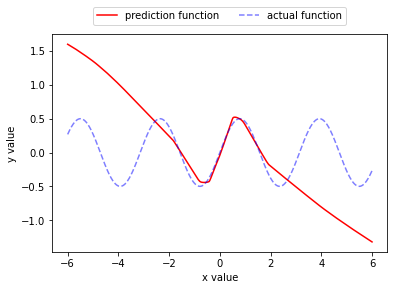

time: 6.73 s (started: 2022-02-10 19:11:23 +00:00)


In [48]:
noise_mult = 1
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 3, batch_size = 32, 
                            train_min_value = float(-3), train_max_value = float(3),
                            test_min_value = float(-6), test_max_value = float(6),
                            dataset_size = 2000, number_of_plotted_samples = 500,
                            function = lambda x: eval('np.sin(x)*np.cos(x)'),
                            loss_function=mean_squared_error, neuran_scale = 128,
                            noise_mult=noise_mult)

regressor.make_dataset(include_noise = True)
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
print(f'noise factor: {noise_mult}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.024791425094008446
#############
Fold 2 - Loss: 0.05577710270881653
#############
Fold 3 - Loss: 0.05554080381989479
#############
Fold 4 - Loss: 0.023134872317314148
#############
Fold 5 - Loss: 0.04274408519268036
#############
Average scores for all folds:
Loss: 0.04039765782654285
#############
best loss value seen: 0.023134872317314148
average loss value over all folds: 0.04039765782654285
noise factor: 10


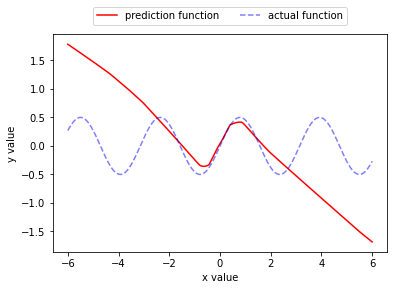

time: 6.66 s (started: 2022-02-10 19:17:12 +00:00)


In [53]:
noise_mult = 10
regressor = Section_1_model(number_of_layers = 5, number_of_epochs = 3, batch_size = 32, 
                            train_min_value = float(-3), train_max_value = float(3),
                            test_min_value = float(-6), test_max_value = float(6),
                            dataset_size = 2000, number_of_plotted_samples = 500,
                            function = lambda x: eval('np.sin(x)*np.cos(x)'),
                            loss_function=mean_squared_error, neuran_scale = 128,
                            noise_mult=noise_mult)

regressor.make_dataset(include_noise = True)
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
print(f'noise factor: {noise_mult}')
regressor.plot()

# Section 3

In [16]:
class Section_3_model:
    def __init__(self, function=None, number_of_layers=5, batch_size=1, number_of_epochs=1,
                 loss_function=mean_squared_error, dataset_size=20000,
                 train_min_value=1, train_max_value=5, test_min_value=0, 
                 test_max_value=10, number_of_plotted_samples=2000,
                 neuran_scale = 128, dimention = 2):
        self.number_of_layers = number_of_layers
        self.batch_size = batch_size
        self.number_of_epochs = number_of_epochs
        self.loss_function = loss_function
        self.dataset_size = dataset_size
        self.train_min_value = train_min_value
        self.train_max_value = train_max_value
        self.test_min_value = test_min_value
        self.test_max_value = test_max_value
        self.function = function
        self.number_of_plotted_samples = number_of_plotted_samples
        self.X_values = None
        self.y_values = None
        self.model = None
        self.neuran_scale = neuran_scale
        self.dimention = dimention

    def make_dataset(self):
      X_values = np.random.uniform(self.train_min_value, self.train_max_value, (self.dataset_size, self.dimention))
      y_values = self.function(*X_values)
      permuted_data = np.random.permutation(self.dataset_size)
      self.X_values = X_values[permuted_data]
      self.y_values = y_values[permuted_data]

    def train(self):
        k_fold = KFold(n_splits=self.number_of_layers, shuffle=True)

        loss_in_each_fold = []
        all_models = []
        fold_number = 1
        for train, test in k_fold.split(self.X_values, self.y_values):
            model = keras.Sequential()
            model.add(keras.layers.Dense(self.neuran_scale, input_dim=self.dimention, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(self.neuran_scale*2, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(self.neuran_scale*4, kernel_initializer='normal', activation='exponential'))
            model.add(keras.layers.Dense(self.neuran_scale*4, kernel_initializer='normal', activation='relu'))
            model.add(keras.layers.Dense(1, kernel_initializer='normal', activation='linear'))

            model.compile(loss=self.loss_function, optimizer='adam')

            history = model.fit(self.X_values[train], self.y_values[train], batch_size=self.batch_size,
                                epochs=self.number_of_epochs, verbose=False)
            scores = model.evaluate(self.X_values[test], self.y_values[test], verbose=0)
            loss_in_each_fold.append(scores)
            all_models.append(model)

            fold_number = fold_number + 1

        print('#############')
        print('Score per each fold is: ')
        for i in range(0, len(loss_in_each_fold)):
            print('#############')
            print(f'Fold {i + 1} - Loss: {loss_in_each_fold[i]}')
        print('#############')
        print('Average scores for all folds:')
        print(f'Loss: {np.mean(loss_in_each_fold)}')
        print('#############')

        best_model_index = np.argmin(loss_in_each_fold)
        best_model = all_models[best_model_index]
        self.model = best_model
        self.best_loss = loss_in_each_fold[best_model_index]
        self.avg_loss = np.mean(loss_in_each_fold)
        return best_model

    def plot(self):

      test_range = np.random.uniform(self.test_min_value, self.test_max_value,
                                    (self.number_of_plotted_samples, self.dimention))
      z_value = self.function(*test_range)
      predicted_z_value = self.model.predict(test_range)
      z_value = z_value.reshape(self.number_of_plotted_samples)
      predicted_z_value= predicted_z_value.reshape(self.number_of_plotted_samples)
      fig = plt.figure()
      ax = fig.gca(projection='3d')
      ax.plot_trisurf(test_range[:, 0], test_range[:, 1], predicted_z_value, alpha=0.6, antialiased = True,
                         cmap = plt.get_cmap('cool'))
      ax.plot_trisurf(test_range[:, 0], test_range[:, 1], z_value, alpha=0.5, antialiased = True,
                         cmap = plt.get_cmap('hot'))
      ax.set_xlabel('X-axis', fontweight ='bold')
      ax.set_ylabel('Y-axis', fontweight ='bold')
      ax.set_zlabel('Z-axis', fontweight ='bold')
      ax.set_title('my model Vs. actual function')
      plt.show()



    def add_noise(self, number):
          noise_multiplier = (random.random() - 0.5) * 2 * self.noise_mult
          return number * (1 + noise_multiplier)

def data_generator(*args):
    arr = np.array(args)
    return np.sin(arr[:, 0]) + np.sin(arr[:, 1])

time: 151 ms (started: 2022-02-10 18:45:33 +00:00)


#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.02685236744582653
#############
Fold 2 - Loss: 0.023465661332011223
#############
Fold 3 - Loss: 0.01643320731818676
#############
Fold 4 - Loss: 0.017679454758763313
#############
Fold 5 - Loss: 0.01433841697871685
#############
Average scores for all folds:
Loss: 0.019753821566700934
#############
best loss value seen: 0.01433841697871685
average loss value over all folds: 0.019753821566700934


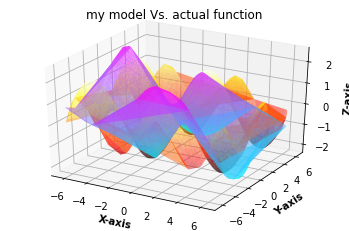

time: 9.64 s (started: 2022-02-10 18:45:33 +00:00)


In [17]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 2000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Experiment 1: Increase number of epochs.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.004917214158922434
#############
Fold 2 - Loss: 0.0028230345342308283
#############
Fold 3 - Loss: 0.0024556652642786503
#############
Fold 4 - Loss: 0.0016532621812075377
#############
Fold 5 - Loss: 0.003243225859478116
#############
Average scores for all folds:
Loss: 0.003018480399623513
#############
best loss value seen: 0.0016532621812075377
average loss value over all folds: 0.003018480399623513


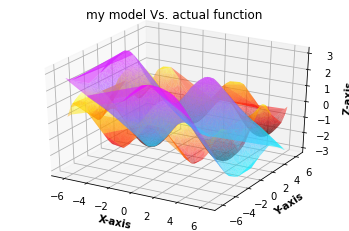

time: 12.7 s (started: 2022-02-10 18:45:43 +00:00)


In [18]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 10, batch_size = 32, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 2000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Experiment 2: Increase dataset size.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.0016816317802295089
#############
Fold 2 - Loss: 0.0017561884596943855
#############
Fold 3 - Loss: 0.0018020863644778728
#############
Fold 4 - Loss: 0.0011543764267116785
#############
Fold 5 - Loss: 0.005019980017095804
#############
Average scores for all folds:
Loss: 0.00228285260964185
#############
best loss value seen: 0.0011543764267116785
average loss value over all folds: 0.00228285260964185


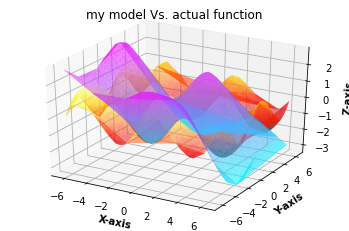

time: 12.6 s (started: 2022-02-10 18:45:56 +00:00)


In [19]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 32, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 4000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Experiment 3: Increase dataset size and number of epochs.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.003561340505257249
#############
Fold 2 - Loss: 0.0005324470694176853
#############
Fold 3 - Loss: 0.0009116061264649034
#############
Fold 4 - Loss: 0.0011053227353841066
#############
Fold 5 - Loss: 0.0008058238308876753
#############
Average scores for all folds:
Loss: 0.0013833080534823238
#############
best loss value seen: 0.0005324470694176853
average loss value over all folds: 0.0013833080534823238


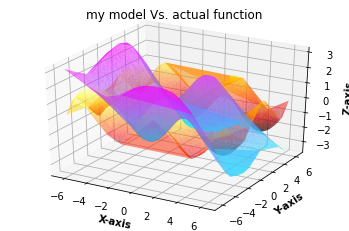

time: 18.5 s (started: 2022-02-10 18:46:08 +00:00)


In [20]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 10, batch_size = 32, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 4000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Expreriment 4: Increase batch size.

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.2075825333595276
#############
Fold 2 - Loss: 0.15649473667144775
#############
Fold 3 - Loss: 0.16461996734142303
#############
Fold 4 - Loss: 0.21479374170303345
#############
Fold 5 - Loss: 0.19209495186805725
#############
Average scores for all folds:
Loss: 0.18711718618869783
#############
best loss value seen: 0.15649473667144775
average loss value over all folds: 0.18711718618869783


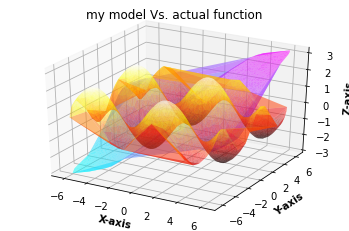

time: 8.65 s (started: 2022-02-10 18:46:27 +00:00)


In [21]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 5, batch_size = 64, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 2000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

Experiment 3: Increase dataset size and number of epochs and batch size

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.000722504046279937
#############
Fold 2 - Loss: 0.0003146779490634799
#############
Fold 3 - Loss: 0.0013769619399681687
#############
Fold 4 - Loss: 0.0008856606436893344
#############
Fold 5 - Loss: 0.001415434293448925
#############
Average scores for all folds:
Loss: 0.000943047774489969
#############
best loss value seen: 0.0003146779490634799
average loss value over all folds: 0.000943047774489969


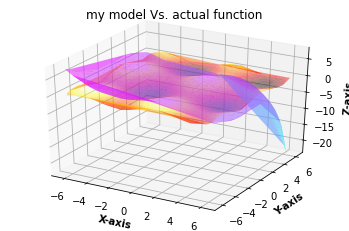

time: 12.6 s (started: 2022-02-10 18:46:35 +00:00)


In [22]:
regressor = Section_3_model(number_of_layers = 5, number_of_epochs = 10, batch_size = 64, 
                            train_min_value = [-np.pi, -np.pi], train_max_value = [np.pi, np.pi],
                            test_min_value = [-2 * np.pi, -2 * np.pi], test_max_value = [2 * np.pi, 2 * np.pi],
                            dataset_size = 4000, number_of_plotted_samples = 4000,
                            function = data_generator,
                            loss_function=mean_squared_error)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

# Section 4
Instead of guessing, I will make a picture and read the data from it, first_point I need to make some changes to my previously made model.

In [25]:
class Section_4_model:
    def __init__(self, number_of_layers=5, batch_size=1, 
                 number_of_epochs=1,
                 loss_function=mean_squared_error, 
                 file_address = None,
                 neuran_scale = 128):
        self.number_of_layers = number_of_layers
        self.batch_size = batch_size
        self.number_of_epochs = number_of_epochs
        self.loss_function = loss_function
        self.X_values = None
        self.y_values = None
        self.model = None
        self.neuran_scale = neuran_scale
        self.file_address = file_address
        self.image_width = 0
        self.image_height = 0

    # Scan the input file and find start and end of data
    def scanner(self, img: np.array, col, height):
        for i in range(height):
            if (img[i, col] == 0):
                return i
        return height

    def left_most_point(self, arr: np.array, invalid_number):
        size = len(arr)
        for i in range(size):
            if (arr[i] != invalid_number):
                return i

    def right_most_point(self, arr: np.array, invalid_number):
        size = len(arr) - 1
        for i in range(size, -1, -1):
            if (arr[i] != invalid_number):
                return i

    def all_valid_points(self, arr, invalid_number):
        return self.left_most_point(arr, invalid_number), self.right_most_point(arr, invalid_number)


    def make_dataset(self, include_noise = False):
      input = Image.open(self.file_address, 'r')
      input = np.array(input.convert('L'))
      self.height, self.width = input.shape
      range_ = np.random.randint(0, self.width, self.width//4)
      y_values = np.array(list(map(lambda x: self.scanner(input, x, self.height), range_)))
      first_point, last = self.all_valid_points(y_values, self.height)
      y_values = y_values[first_point:last]
      range_ = range_[first_point:last]
      y_values = (self.height - y_values)
      new_len = len(y_values)
      permutations = np.random.permutation(new_len)
      self.X_values = range_[permutations]/self.width
      self.y_values = y_values[permutations]/self.height

    def train(self):
        k_fold = KFold(n_splits=self.number_of_layers, shuffle=True)

        loss_in_each_fold = []
        all_models = []
        fold_number = 1
        for train, test in k_fold.split(self.X_values, self.y_values):
            model = keras.Sequential()
            model.add(keras.layers.Dense(1, input_dim=1, kernel_initializer='he_uniform', activation='linear'))
            model.add(keras.layers.Dense(self.neuran_scale, kernel_initializer='he_uniform', activation='relu'))
            model.add(keras.layers.Dense(self.neuran_scale, kernel_initializer='he_uniform', activation='exponential'))
            model.add(keras.layers.Dense(self.neuran_scale, kernel_initializer='he_uniform', activation='relu'))
            model.add(keras.layers.Dense(1, activation='linear'))

            model.compile(loss='mse', optimizer=keras.optimizers.Nadam(learning_rate=0.01))

            history = model.fit(self.X_values[train], self.y_values[train], batch_size=self.batch_size,
                                epochs=self.number_of_epochs, verbose=False)
            scores = model.evaluate(self.X_values[test], self.y_values[test], verbose=0)
            loss_in_each_fold.append(scores)
            all_models.append(model)

            fold_number = fold_number + 1

        print('#############')
        print('Score per each fold is: ')
        for i in range(0, len(loss_in_each_fold)):
            print('#############')
            print(f'Fold {i + 1} - Loss: {loss_in_each_fold[i]}')
        print('#############')
        print('Average scores for all folds:')
        print(f'Loss: {np.mean(loss_in_each_fold)}')
        print('#############')

        best_model_index = np.argmin(loss_in_each_fold)
        best_model = all_models[best_model_index]
        self.model = best_model
        self.best_loss = loss_in_each_fold[best_model_index]
        self.avg_loss = np.mean(loss_in_each_fold)
        return best_model

    def plot(self):      
      test_range = np.linspace(0, 1, self.width // 2)
      predicted_y = self.model.predict(test_range)
      actual_x_values, actual_y_values = self.all_points()

      plt.plot(test_range, predicted_y, '-r', label = 'prediction function')
      plt.plot(actual_x_values, actual_y_values, '--b', alpha=0.5, label = 'actual function')
      plt.xlabel('x value')
      plt.ylabel('y value')
      plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
      plt.show()

    def all_points(self):
        img = Image.open(self.file_address, 'r')
        img = np.array(img.convert('L'))
        height, width = img.shape

        range_ = list(range(0, width))
        range_ = np.sort(range_)
        y_s = np.array(list(map(lambda x: self.scanner(img, x, height), range_)))
        first_point, last = self.all_valid_points(y_s, height)
        y_s = y_s[first_point:last]
        range_ = range_[first_point:last]
        y_s = (height - y_s)
        return range_ / width, y_s / height

    def add_noise(self, number):
          noise_multiplier = (random.random() - 0.5) * 2 * self.noise_mult
          return number * (1 + noise_multiplier)


time: 230 ms (started: 2022-02-10 18:49:01 +00:00)


#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.004186550155282021
#############
Fold 2 - Loss: 0.01305109728127718
#############
Fold 3 - Loss: 0.004471616819500923
#############
Fold 4 - Loss: 0.003290605265647173
#############
Fold 5 - Loss: 0.0037179766222834587
#############
Average scores for all folds:
Loss: 0.005743569228798151
#############
best loss value seen: 0.003290605265647173
average loss value over all folds: 0.005743569228798151


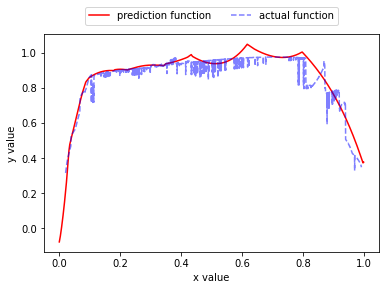

time: 52.5 s (started: 2022-02-10 18:49:02 +00:00)


In [26]:
regressor = Section_4_model(number_of_layers=5, batch_size=16, 
                 number_of_epochs=50,
                 file_address = '/content/Draft-362.jpg',
                 neuran_scale = 40)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.02874460257589817
#############
Fold 2 - Loss: 0.015036550350487232
#############
Fold 3 - Loss: 0.019833555445075035
#############
Fold 4 - Loss: 0.037617698311805725
#############
Fold 5 - Loss: 0.01757802627980709
#############
Average scores for all folds:
Loss: 0.02376208659261465
#############
best loss value seen: 0.015036550350487232
average loss value over all folds: 0.02376208659261465


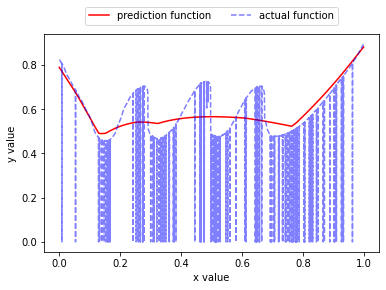

time: 1min 5s (started: 2022-02-10 18:49:54 +00:00)


In [27]:
regressor = Section_4_model(number_of_layers=5, batch_size=16, 
                 number_of_epochs=60,
                 file_address = '/content/Draft-363.jpg',
                 neuran_scale = 40)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.05515456944704056
#############
Fold 2 - Loss: 0.028675585985183716
#############
Fold 3 - Loss: 0.05217955261468887
#############
Fold 4 - Loss: 0.05221448093652725
#############
Fold 5 - Loss: 0.0203873198479414
#############
Average scores for all folds:
Loss: 0.04172230176627636
#############
best loss value seen: 0.0203873198479414
average loss value over all folds: 0.04172230176627636


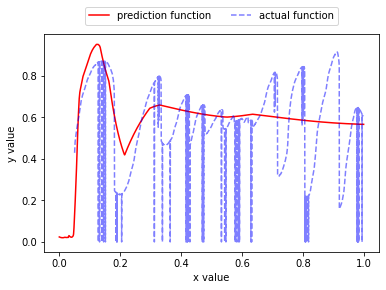

time: 1min 5s (started: 2022-02-10 18:51:00 +00:00)


In [28]:
regressor = Section_4_model(number_of_layers=5, batch_size=16, 
                 number_of_epochs=60,
                 file_address = '/content/Draft-364.jpg',
                 neuran_scale = 40)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

#############
Score per each fold is: 
#############
Fold 1 - Loss: 0.01974211446940899
#############
Fold 2 - Loss: 0.021825376898050308
#############
Fold 3 - Loss: 0.0249504242092371
#############
Fold 4 - Loss: 0.01934516243636608
#############
Fold 5 - Loss: 0.0158613920211792
#############
Average scores for all folds:
Loss: 0.020344894006848337
#############
best loss value seen: 0.0158613920211792
average loss value over all folds: 0.020344894006848337


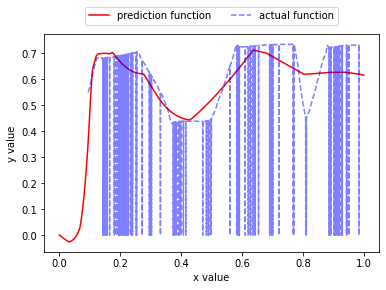

time: 1min 6s (started: 2022-02-10 18:52:06 +00:00)


In [29]:
regressor = Section_4_model(number_of_layers=5, batch_size=16, 
                 number_of_epochs=60,
                 file_address = '/content/Draft-365.jpg',
                 neuran_scale = 40)

regressor.make_dataset()
regressor.train()
print(f'best loss value seen: {regressor.best_loss}')
print(f'average loss value over all folds: {regressor.avg_loss}')
regressor.plot()

# Section 5

In [30]:
class Section_5_model:
    def __init__(self, number_of_layers=5, batch_size=64, number_of_epochs=10,
                 loss_function=sparse_categorical_crossentropy):
        self.number_of_layers = number_of_layers
        self.batch_size = batch_size
        self.number_of_epochs = number_of_epochs
        self.loss_function = loss_function
        self.images = None
        self.labels = None
        self.model = None

    def load_dataset(self):
        (train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

        images = np.concatenate((train_images, test_images), axis=0)
        labels = np.concatenate((train_labels, test_labels), axis=0)

        self.images = images
        self.labels = labels

    def train(self):
        k_fold = KFold(n_splits=self.number_of_layers, shuffle=True)
        accuracy_in_each_fold = []
        loss_per_each_fold = []
        fold_number = 1
        all_models = []
        for train, test in k_fold.split(self.images, self.labels):
            model = keras.Sequential()
            model.add(keras.layers.Flatten(input_shape=(28, 28)))
            model.add(keras.layers.Dense(28*28+2, activation='sigmoid'))
            model.add(keras.layers.Dense(10, activation='softmax'))

            model.compile(loss=self.loss_function, metrics=['accuracy'], optimizer='adam')

            history = model.fit(self.images[train], self.labels[train],
                                batch_size=self.batch_size,
                                epochs=self.number_of_epochs,
                                verbose=False)

            scores = model.evaluate(self.images[test], self.labels[test], verbose=0)
            print(
                f'Score for fold {fold_number}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1] * 100}%')
            accuracy_in_each_fold.append(scores[1] * 100)
            loss_per_each_fold.append(scores[0])
            all_models.append(model)
            fold_number = fold_number + 1

        print('################')
        print('Score per each fold')
        for i in range(0, len(accuracy_in_each_fold)):
            print('################')
            print(f'Fold {i + 1} - Loss: {loss_per_each_fold[i]} - Accuracy: {accuracy_in_each_fold[i]}%')
        print('################')
        print('Average scores for all folds:')
        print(f'Accuracy: {np.mean(accuracy_in_each_fold)} (+- {np.std(accuracy_in_each_fold)})')
        print(f'Loss: {np.mean(loss_per_each_fold)}')
        print('################')
        best_model_index = np.argmin(loss_per_each_fold)
        best_model = all_models[best_model_index]
        self.model = best_model
        self.best_loss = loss_per_each_fold[best_model_index]
        self.avg_loss = np.mean(loss_per_each_fold)
        return best_model

    def image_predict(self, index):
        fig = plt.figure()
        plt.imshow(self.images[index])
        image = np.array(self.images[index]).reshape(-1, 28, 28)
        answer = self.model.predict(image)
        return fig, np.argmax(answer)

time: 84.8 ms (started: 2022-02-10 18:53:12 +00:00)


In [31]:
classifier = Section_5_model(number_of_layers=10, batch_size=128, 
                 number_of_epochs=10,
                 loss_function=sparse_categorical_crossentropy)

classifier.load_dataset()
classifier.train()
print(f'best loss value seen: {classifier.best_loss}')
print(f'average loss value over all folds: {classifier.avg_loss}')

Score for fold 1: loss of 0.16196776926517487; accuracy of 95.4714298248291%
Score for fold 2: loss of 0.16507522761821747; accuracy of 94.98571157455444%
Score for fold 3: loss of 0.1679506152868271; accuracy of 94.97143030166626%
Score for fold 4: loss of 0.1675097495317459; accuracy of 95.02857327461243%
Score for fold 5: loss of 0.17126835882663727; accuracy of 94.88571286201477%
Score for fold 6: loss of 0.167832612991333; accuracy of 94.81428861618042%
Score for fold 7: loss of 0.16893206536769867; accuracy of 95.20000219345093%
Score for fold 8: loss of 0.17056190967559814; accuracy of 94.70000267028809%
Score for fold 9: loss of 0.1650056540966034; accuracy of 94.94285583496094%
Score for fold 10: loss of 0.1670561283826828; accuracy of 95.02857327461243%
################
Score per each fold
################
Fold 1 - Loss: 0.16196776926517487 - Accuracy: 95.4714298248291%
################
Fold 2 - Loss: 0.16507522761821747 - Accuracy: 94.98571157455444%
################
Fold 3 

2


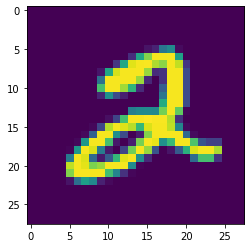

time: 271 ms (started: 2022-02-10 19:16:12 +00:00)


In [50]:
image, prediction = classifier.image_predict(5)
print(prediction)

7


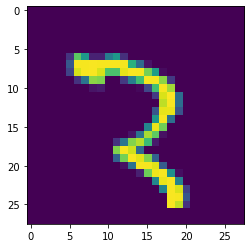

time: 288 ms (started: 2022-02-10 19:16:22 +00:00)


In [51]:
image, prediction = classifier.image_predict(500)
print(prediction)

3


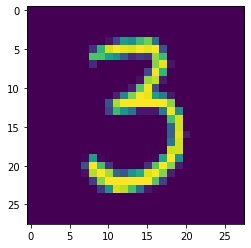

time: 264 ms (started: 2022-02-10 19:16:37 +00:00)


In [52]:
image, prediction = classifier.image_predict(50)
print(prediction)

# Section 6

In [33]:
class Section_6_model:
    def __init__(self, folds=5, batch_size=32, number_of_epochs=10,
                 loss_function=mean_absolute_error, dataset_size=10000,
                 noise_type='gaussian',
                 noise_degree=0
                 ):
        self.folds = folds
        self.batch_size = batch_size
        self.number_of_epochs = number_of_epochs
        self.loss_function = loss_function
        self.images = None
        self.noisy_dataset = None
        self.dataset_size = dataset_size
        self.model = None
        self.noise_type = noise_type
        self.noise_degree = noise_degree

    def add_noise(self, image, mode):
        noisy_image = image
        if mode is not None:
            if (self.noise_degree == 1):
                noisy_image = skimage.util.random_noise(image, mode=mode, clip=True)
            elif (self.noise_degree == 2):
                stage_1 = skimage.util.random_noise(image, mode=mode, clip=True)
                stage_2 = skimage.util.random_noise(stage_1, mode=mode, clip=True)
                noisy_image = skimage.util.random_noise(stage_2, mode=mode, clip=True)
            elif (self.noise_degree == 3):
                stage_1 = skimage.util.random_noise(image, mode=mode, clip=True)
                stage_2 = skimage.util.random_noise(stage_1, mode=mode, clip=True)
                stage_3 = skimage.util.random_noise(stage_2, mode=mode, clip=True)
                stage_4 = skimage.util.random_noise(stage_3, mode=mode, clip=True)
                noisy_image = skimage.util.random_noise(stage_4, mode=mode, clip=False)
            elif (self.noise_degree == 4):
                stage_1 = skimage.util.random_noise(image, mode=mode, clip=True)
                stage_2 = skimage.util.random_noise(stage_1, mode=mode, clip=True)
                stage_3 = skimage.util.random_noise(stage_2, mode=mode, clip=True)
                stage_4 = skimage.util.random_noise(stage_3, mode=mode, clip=True)
                stage_5 = skimage.util.random_noise(stage_4, mode=mode, clip=False)
                noisy_image = skimage.util.random_noise(stage_5, mode='s&p', clip=False)
            elif (self.noise_degree == 5):
                stage_1 = skimage.util.random_noise(image, mode=mode, clip=True)
                stage_2 = skimage.util.random_noise(stage_1, mode=mode, clip=True)
                stage_3 = skimage.util.random_noise(stage_2, mode=mode, clip=True)
                stage_4 = skimage.util.random_noise(stage_3, mode=mode, clip=True)
                stage_5 = skimage.util.random_noise(stage_4, mode=mode, clip=False)
                stage_6 = skimage.util.random_noise(stage_5, mode='s&p', clip=False)
                stage_7 = Image.fromarray(np.uint8(cm.gist_gray(stage_6) * 255))
                stage_8 = stage_7.filter(ImageFilter.BLUR)
                stage_9 = np.asarray(stage_8) / 255
                gray_scale = lambda rgb: np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
                noisy_image = gray_scale(stage_9)
        return noisy_image

    def load_dataset(self):
        (train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
        train_images = train_images / 255
        test_images = test_images / 255
        images = np.concatenate((train_images, test_images), axis=0)

        permutation = np.random.permutation((len(images)))
        images = images[permutation]
        images = images[0:self.dataset_size]
        noisy_dataset = np.array(list(map(lambda x: self.add_noise(x, self.noise_type), images))).reshape(
            -1, 28, 28)
        self.images = images
        self.noisy_dataset = noisy_dataset

    def train(self):
        k_fold = KFold(n_splits=self.folds, shuffle=True)
        loss_per_fold = []
        fold_no = 1
        all_models = []
        for train, test in k_fold.split(self.noisy_dataset, self.images):
            model = keras.Sequential()
            model.add(keras.layers.Dense(28*28, activation='relu'))
            model.add(keras.layers.Dense(28*28 * 2, activation='sigmoid'))
            model.add(keras.layers.Dense(28*28, activation='sigmoid'))

            model.compile(loss=self.loss_function, optimizer='adam')

            history = model.fit(self.noisy_dataset[train].reshape(-1, 28*28),
                                self.images[train].reshape(-1, 28*28),
                                batch_size=self.batch_size,
                                epochs=self.number_of_epochs,
                                verbose=False)
            scores = model.evaluate(self.noisy_dataset[test].reshape(-1, 28*28), self.images[test].reshape(-1, 28*28),
                                    verbose=0)
            print(
                f'Score for fold {fold_no}: {model.metrics_names} of {scores};')
            loss_per_fold.append(scores)
            all_models.append(model)
            fold_no = fold_no + 1
        print('##################')
        print('Score per each individual fold: ')
        for i in range(0, len(loss_per_fold)):
            print('##################')
            print(f'Fold {i + 1} - Loss: {loss_per_fold[i]}')
        print('##################')
        print('Average score over all folds:')
        print(f'Loss: {np.mean(loss_per_fold)}')
        print('##################')
        best_model_index = np.argmin(loss_per_fold)
        best_model = all_models[best_model_index]
        self.model = best_model
        self.best_loss = loss_per_fold[best_model_index]
        self.avg_loss = np.mean(loss_per_fold)
        return best_model

    def beutify_image(self, index):
        image = self.noisy_dataset[index]
        reformed_image = self.model.predict(np.array(image).reshape(-1, 28 * 28))
        original_image = self.images[index]
        return image.reshape(28, 28), reformed_image.reshape(28, 28), original_image.reshape(28, 28)

    def plot_images(self, index, sub_plots, range_, is_one_line):
        noised, enhanced, original = self.beutify_image(index)
        if (is_one_line):
            sub_plots[0].imshow(noised)
            sub_plots[1].imshow(enhanced)
            sub_plots[2].imshow(original)

        else:
            sub_plots[range_, 0].imshow(noised)
            sub_plots[range_, 1].imshow(enhanced)
            sub_plots[range_, 2].imshow(original)
        return sub_plots

    def plot_image(self, indices):
        range_ = len(indices)
        figure = plt.figure(dpi=100)
        sub_plots = figure.subplots(range_, 3)
        is_one_line = True if range_ == 1 else False
        for i in range(range_):
            sub_plots = self.plot_images(indices[i], sub_plots, i, is_one_line=is_one_line)
        if is_one_line:
            sub_plots[0].set_title("Noisy Image")
            sub_plots[1].set_title("Image Output\n By Our Model")
            sub_plots[2].set_title("Original Image")
        else:
            sub_plots[0, 0].set_title("Noisy Image")
            sub_plots[0, 1].set_title("Image Output\n By Our Model")
            sub_plots[0, 2].set_title("Original Image")

time: 319 ms (started: 2022-02-10 18:56:04 +00:00)


In [34]:
classifier_1 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=0)

classifier_1.load_dataset()
classifier_1.train()
print(f'best loss value seen: {classifier_1.best_loss}')
print(f'average loss value over all folds: {classifier_1.avg_loss}')

Score for fold 1: ['loss'] of 0.028727032244205475;
Score for fold 2: ['loss'] of 0.0280954260379076;
Score for fold 3: ['loss'] of 0.028546873480081558;
Score for fold 4: ['loss'] of 0.02706773579120636;
Score for fold 5: ['loss'] of 0.02776329591870308;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.028727032244205475
##################
Fold 2 - Loss: 0.0280954260379076
##################
Fold 3 - Loss: 0.028546873480081558
##################
Fold 4 - Loss: 0.02706773579120636
##################
Fold 5 - Loss: 0.02776329591870308
##################
Average score over all folds:
Loss: 0.028040072694420815
##################
best loss value seen: 0.02706773579120636
average loss value over all folds: 0.028040072694420815
time: 2min 49s (started: 2022-02-10 18:56:05 +00:00)


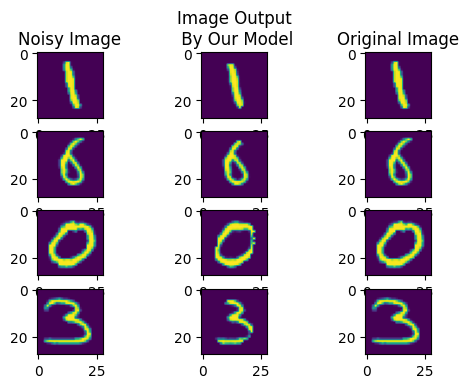

time: 1.94 s (started: 2022-02-10 18:58:54 +00:00)


In [35]:
classifier_1.plot_image([10, 0, 3, 8])

In [36]:
classifier_2 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=1)

classifier_2.load_dataset()
classifier_2.train()
print(f'best loss value seen: {classifier_2.best_loss}')
print(f'average loss value over all folds: {classifier_2.avg_loss}')

Score for fold 1: ['loss'] of 0.030822118744254112;
Score for fold 2: ['loss'] of 0.0299976896494627;
Score for fold 3: ['loss'] of 0.03104385919868946;
Score for fold 4: ['loss'] of 0.02995159849524498;
Score for fold 5: ['loss'] of 0.029876919463276863;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.030822118744254112
##################
Fold 2 - Loss: 0.0299976896494627
##################
Fold 3 - Loss: 0.03104385919868946
##################
Fold 4 - Loss: 0.02995159849524498
##################
Fold 5 - Loss: 0.029876919463276863
##################
Average score over all folds:
Loss: 0.030338437110185624
##################
best loss value seen: 0.029876919463276863
average loss value over all folds: 0.030338437110185624
time: 3min 11s (started: 2022-02-10 18:58:56 +00:00)


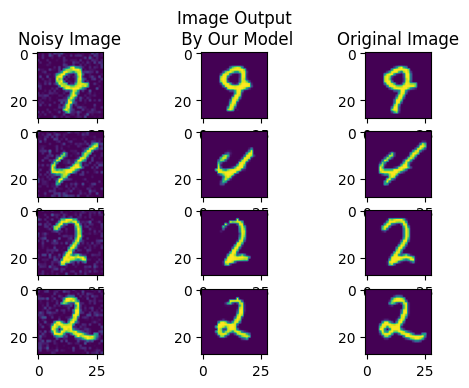

time: 1.96 s (started: 2022-02-10 19:02:08 +00:00)


In [37]:
classifier_2.plot_image([10, 0, 3, 8])

In [38]:
classifier_3 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=2)

classifier_3.load_dataset()
classifier_3.train()
print(f'best loss value seen: {classifier_3.best_loss}')
print(f'average loss value over all folds: {classifier_3.avg_loss}')

Score for fold 1: ['loss'] of 0.03189285844564438;
Score for fold 2: ['loss'] of 0.03243328258395195;
Score for fold 3: ['loss'] of 0.03172352910041809;
Score for fold 4: ['loss'] of 0.03264158219099045;
Score for fold 5: ['loss'] of 0.03214293718338013;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.03189285844564438
##################
Fold 2 - Loss: 0.03243328258395195
##################
Fold 3 - Loss: 0.03172352910041809
##################
Fold 4 - Loss: 0.03264158219099045
##################
Fold 5 - Loss: 0.03214293718338013
##################
Average score over all folds:
Loss: 0.032166837900877
##################
best loss value seen: 0.03172352910041809
average loss value over all folds: 0.032166837900877
time: 1min 52s (started: 2022-02-10 19:02:10 +00:00)


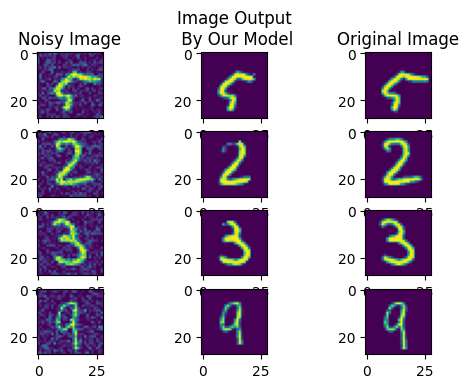

time: 2.33 s (started: 2022-02-10 19:04:03 +00:00)


In [39]:
classifier_3.plot_image([10, 0, 3, 8])

In [40]:
classifier_4 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=3)

classifier_4.load_dataset()
classifier_4.train()
print(f'best loss value seen: {classifier_4.best_loss}')
print(f'average loss value over all folds: {classifier_4.avg_loss}')

Score for fold 1: ['loss'] of 0.035048700869083405;
Score for fold 2: ['loss'] of 0.03562593832612038;
Score for fold 3: ['loss'] of 0.03701029717922211;
Score for fold 4: ['loss'] of 0.03497019782662392;
Score for fold 5: ['loss'] of 0.03460618108510971;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.035048700869083405
##################
Fold 2 - Loss: 0.03562593832612038
##################
Fold 3 - Loss: 0.03701029717922211
##################
Fold 4 - Loss: 0.03497019782662392
##################
Fold 5 - Loss: 0.03460618108510971
##################
Average score over all folds:
Loss: 0.035452263057231904
##################
best loss value seen: 0.03460618108510971
average loss value over all folds: 0.035452263057231904
time: 2min 16s (started: 2022-02-10 19:04:05 +00:00)


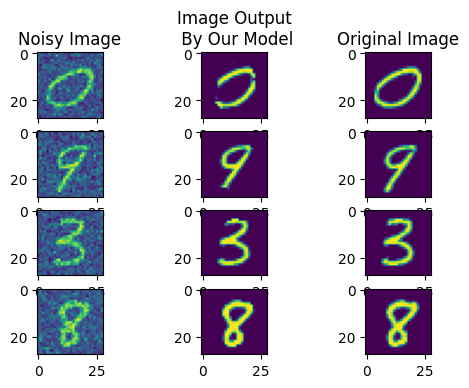

time: 2.03 s (started: 2022-02-10 19:06:21 +00:00)


In [41]:
classifier_4.plot_image([10, 0, 3, 8])

In [42]:
classifier_5 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=4)

classifier_5.load_dataset()
classifier_5.train()
print(f'best loss value seen: {classifier_5.best_loss}')
print(f'average loss value over all folds: {classifier_5.avg_loss}')

Score for fold 1: ['loss'] of 0.04331741854548454;
Score for fold 2: ['loss'] of 0.04479242116212845;
Score for fold 3: ['loss'] of 0.04427976533770561;
Score for fold 4: ['loss'] of 0.044756773859262466;
Score for fold 5: ['loss'] of 0.04487846419215202;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.04331741854548454
##################
Fold 2 - Loss: 0.04479242116212845
##################
Fold 3 - Loss: 0.04427976533770561
##################
Fold 4 - Loss: 0.044756773859262466
##################
Fold 5 - Loss: 0.04487846419215202
##################
Average score over all folds:
Loss: 0.04440496861934662
##################
best loss value seen: 0.04331741854548454
average loss value over all folds: 0.04440496861934662
time: 2min 38s (started: 2022-02-10 19:06:24 +00:00)


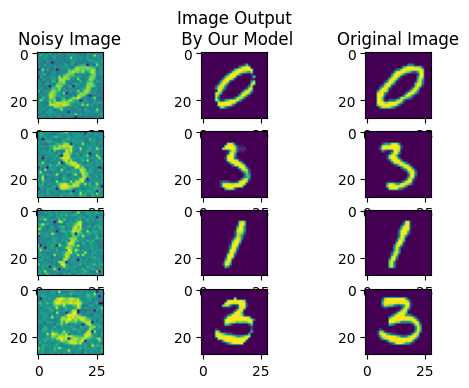

time: 2.3 s (started: 2022-02-10 19:09:02 +00:00)


In [43]:
classifier_5.plot_image([10, 0, 3, 8])

In [44]:
classifier_6 = Section_6_model(number_of_epochs=25, folds=5, 
                             noise_type='localvar', 
                             noise_degree=5)

classifier_6.load_dataset()
classifier_6.train()
print(f'best loss value seen: {classifier_6.best_loss}')
print(f'average loss value over all folds: {classifier_6.avg_loss}')

Score for fold 1: ['loss'] of 0.04307810217142105;
Score for fold 2: ['loss'] of 0.042848631739616394;
Score for fold 3: ['loss'] of 0.04165584594011307;
Score for fold 4: ['loss'] of 0.043279293924570084;
Score for fold 5: ['loss'] of 0.043712858110666275;
##################
Score per each individual fold: 
##################
Fold 1 - Loss: 0.04307810217142105
##################
Fold 2 - Loss: 0.042848631739616394
##################
Fold 3 - Loss: 0.04165584594011307
##################
Fold 4 - Loss: 0.043279293924570084
##################
Fold 5 - Loss: 0.043712858110666275
##################
Average score over all folds:
Loss: 0.04291494637727737
##################
best loss value seen: 0.04165584594011307
average loss value over all folds: 0.04291494637727737
time: 2min 1s (started: 2022-02-10 19:09:04 +00:00)


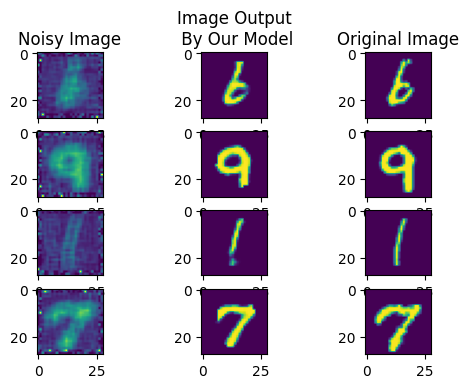

time: 1.92 s (started: 2022-02-10 19:11:06 +00:00)


In [45]:
classifier_6.plot_image([10, 0, 3, 8])